  0%|          | 0/5000 [00:00<?, ?it/s]c:\Users\Guilherme\Documents\Faculdade\p5\projetoML\linear_models.py:96: RuntimeWarning: overflow encountered in exp
  sigm = 1 / (1 + np.exp(y_batch.reshape(-1, 1) * np.dot(w, X_batch.T).reshape(-1, 1)))
100%|██████████| 5000/5000 [00:00<00:00, 17962.05it/s]

              precision    recall  f1-score   support

          -1       0.66      0.65      0.65       291
           1       0.65      0.66      0.66       292

    accuracy                           0.65       583
   macro avg       0.65      0.65      0.65       583
weighted avg       0.65      0.65      0.65       583

[[188. 103.]
 [ 99. 193.]]
Counter({1: 292, -1: 291})
RELATORIO CLASSIFICACAO BINARIA
one_label:  292
zero_label:  291
VP: 193
VN: 188
FP: 103
FN: 99
Binary Error: 0.346483704974271
Acurracy: 0.6535162950257289
positive precision:  0.652027027027027
negative precision:  0.6550522648083623
positive recall:  0.660958904109589
negative recall:  0.6460481099656358
positive f1 score:  0.6564625850340134
negative f1 score:  0.6505190311418686
weighted_f1_score:  0.6534959054754985


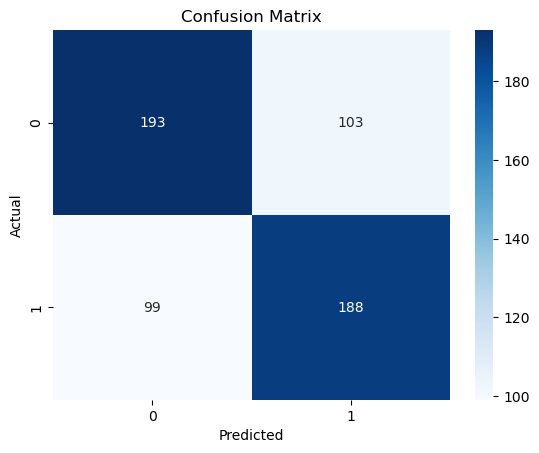

In [42]:
import numpy as np
from numpy.linalg import pinv
from numpy.linalg import inv
import numpy.linalg as LA
import random
from random import sample 
from tqdm import tqdm
from utils import * 
from linear_models import *
np.random.seed(100)

# class LogisticRegression:
    
#     def __init__(self, eta=0.1, tmax=1000, batch_size=2048):
#         self.eta = eta
#         self.tmax = tmax
#         self.batch_size = batch_size
#         self.w = None
    
#     def fit(self, X, y, lamb=1e-6):
#         N, d = X.shape
#         X = np.array(X)
#         y = np.array(y)# .reshape(-1, 1)
#         w = np.zeros(d)

#         for t in tqdm(range(self.tmax)):
#             if self.batch_size < N:
#                 rand_indexes = np.random.choice(N, self.batch_size, replace=False)
#                 X_batch, y_batch = X[rand_indexes], y[rand_indexes]
#             else:
#                 X_batch, y_batch = X, y

#             sigm = 1 / (1 + np.exp(y_batch.reshape(-1, 1) * np.dot(w, X_batch.T).reshape(-1, 1)))
#             gt = - 1 / N * np.sum(X_batch * y_batch.reshape(-1, 1) * sigm, axis=0) 
#             gt += lamb * np.linalg.norm(w)

#             if np.linalg.norm(gt) < 1e-8:
#                 break
            
#             w -= self.eta * gt

#         self.w = w 
    

#     def predict_prob(self, X):
#         return 1 / (1 + np.exp(-np.dot(X, self.w)))

#     def predict(self, X):
#         pred = self.predict_prob(X)
#         y = np.where(pred >= 0.5, 1, -1)
#         return y 


#     def get_w(self):
#         return self.w
    
#     def set_w(self, w):
#         self.w = w


def multiclass_confusion_matrix(y_true, y_pred):
    """
    Compute the confusion matrix for multiclass classification
    """
    # Compute confusion matrix
    labels = sorted(np.unique(y_true))
    n = len(labels)
    print(labelsa)
    cm = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            cm[i, j] = np.sum(np.logical_and(y_pred == labels[j], y_true == labels[i]))
    return cm


def main():
    import pandas as pd
    from sklearn.metrics import classification_report

    new_train_df = pd.read_csv('./dados/train_reduced.csv')
    new_test_df = pd.read_csv('./dados/test_reduced.csv')

    mask1 = new_train_df['label'] == 5
    mask2 = new_train_df['label'] == 1
    mask3 = new_test_df['label'] == 5
    mask4 = new_test_df['label'] == 1

    train1x5 = new_train_df[mask1 | mask2]
    test1x5 = new_test_df[mask3 | mask4]

    X_train = train1x5[['intensidade', 'simetria']]
    X_train = X_train.to_numpy()
    X_train = np.c_[np.ones(X_train.shape[0]), X_train]
    X_test = test1x5[['intensidade', 'simetria']]
    X_test = X_test.to_numpy()
    X_test = np.c_[np.ones(X_test.shape[0]), X_test]

    y_train = [1 if label == 1 else -1 for label in train1x5.label]
    y_test = [1 if label == 1 else -1 for label in test1x5.label]

    modelo =  LogisticRegression(tmax=5000)
    modelo.fit(X_train, y_train)
    ypred = modelo.predict(X_test)
    cm = multiclass_confusion_matrix(y_test, ypred)
    print(classification_report(y_test, ypred))
    print(cm)
    print_metrics(y_test, ypred)
    # plot_classification_digits(test1x5, [1, 5],[ 'blue', 'red'], 'LOGISTICA - Classificacao - Teste 1x5', [modelo.get_w()])
    # print('w = ', modelo.get_w())
    # return modelo.get_w()
    
all_w = main()


In [ ]:
w =  [362.68244818  -5.586095     0.82066129]
# def main():
#     import pandas as pd
#     from sklearn.metrics import classification_report

#     new_train_df = pd.read_csv('./dados/train_reduced.csv')
#     new_test_df = pd.read_csv('./dados/test_reduced.csv')

#     mask1 = new_train_df['label'] == 5
#     mask2 = new_train_df['label'] == 1
#     mask3 = new_test_df['label'] == 5
#     mask4 = new_test_df['label'] == 1

#     train1x5 = new_train_df[mask1 | mask2]
#     test1x5 = new_test_df[mask3 | mask4]

#     X_train = train1x5[['intensidade', 'simetria']]
#     X_train = X_train.to_numpy()
#     X_train = np.c_[np.ones(X_train.shape[0]), X_train]
#     X_test = test1x5[['intensidade', 'simetria']]
#     X_test = X_test.to_numpy()
#     X_test = np.c_[np.ones(X_test.shape[0]), X_test]

#     y_train = [1 if label == 1 else -1 for label in train1x5.label]
#     y_test = [1 if label == 1 else -1 for label in test1x5.label]

#     logistic_reg = LogisticRegression(tmax=1000)
#     logistic_reg.fit(X_train, y_train)
#     ypred = logistic_reg.predict(X_test)
#     print(classification_report(y_test, ypred))

    
# if __name__ == "__main__":
#     main()

